Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

- Vanilla logistic regression
- Ridge logistic regression
- Lasso logistic regression

If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

In [293]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [294]:
# California crime data from 2017

df = pd.read_excel('california.xls', skiprows=4, index_col='State') #skipping first 4 rows of metadata
df.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
State,,,,,,,,,,,
Adelanto,33693.0,238.0,2.0,28.0,48.0,160.0,578.0,190.0,290.0,98.0,13.0
Agoura Hills,20814.0,16.0,0.0,2.0,4.0,10.0,278.0,71.0,187.0,20.0,4.0
Alameda,79761.0,253.0,0.0,16.0,133.0,104.0,2347.0,219.0,1725.0,403.0,25.0
Albany,19880.0,36.0,0.0,1.0,28.0,7.0,523.0,77.0,383.0,63.0,3.0
Alhambra,85865.0,172.0,4.0,17.0,89.0,62.0,1877.0,363.0,1244.0,270.0,12.0


In [295]:
df.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape1', 'Robbery',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

In [296]:
df = df.rename(index=str, columns={'Violent\ncrime' : 'Violent_crime',
                                   'Murder and\nnonnegligent\nmanslaughter' : 'Murder',
                                   'Rape1': 'Rape', 
                                   'Aggravated\nassault': 'Assault', 
                                   'Property\ncrime': 'Property_crime',
                                   'Larceny-\ntheft': 'Larceny_theft',
                                   'Motor\nvehicle\ntheft': 'Motor_theft'})

df.index.rename('County', inplace=True)

In [297]:
df.shape

(464, 11)

In [298]:
df.isna().sum()

Population        3
Violent_crime     3
Murder            3
Rape              3
Robbery           3
Assault           3
Property_crime    4
Burglary          3
Larceny_theft     4
Motor_theft       3
Arson             3
dtype: int64

In [299]:
df.tail()

#for col in df.columns:
#    print(df[df[col].isnull()])
#    
#   # The last three lines are null for every column.

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
County,,,,,,,,,,,
Yucaipa,53614.0,74.0,0.0,12.0,23.0,39.0,927.0,202.0,590.0,135.0,5.0
Yucca Valley,21806.0,65.0,0.0,9.0,18.0,38.0,444.0,148.0,244.0,52.0,2.0
1 The figures shown in this column for the offense of rape were reported using only the revised Uniform Crime Reporting definition of rape. See the data declaration for further explanation.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2 The FBI determined that the agency's data were overreported. Consequently, those data are not included in this table.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"3 Because of changes in the state/local agency's reporting practices, figures are not comparable to previous years' data.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
df = df[:-3]  # removing last three rows with null values

In [301]:
print(df.tail(3))
df.isna().sum()

              Population  Violent_crime  Murder  Rape  Robbery  Assault  \
County                                                                    
Yuba City        67042.0          255.0     0.0  23.0     82.0    150.0   
Yucaipa          53614.0           74.0     0.0  12.0     23.0     39.0   
Yucca Valley     21806.0           65.0     0.0   9.0     18.0     38.0   

              Property_crime  Burglary  Larceny_theft  Motor_theft  Arson  
County                                                                     
Yuba City             2207.0     380.0         1448.0        379.0   15.0  
Yucaipa                927.0     202.0          590.0        135.0    5.0  
Yucca Valley           444.0     148.0          244.0         52.0    2.0  


Population        0
Violent_crime     0
Murder            0
Rape              0
Robbery           0
Assault           0
Property_crime    1
Burglary          0
Larceny_theft     1
Motor_theft       0
Arson             0
dtype: int64

In [302]:
df.describe()

# all quantitative values 

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
count,4.610000e+02,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,460.000000,461.000000,461.000000
mean,7.124899e+04,321.605206,3.184382,27.073753,110.436009,180.911063,1862.060870,318.091106,1231.417391,311.314534,15.503254
std,2.150399e+05,1545.676597,14.851975,124.356076,559.698252,856.083620,5979.033721,924.754478,4055.402225,1101.892752,72.627927
min,1.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.221000e+04,33.000000,0.000000,3.000000,6.000000,19.000000,245.000000,55.000000,152.000000,26.000000,1.000000
50%,3.369300e+04,91.000000,1.000000,8.000000,23.000000,52.000000,697.000000,136.000000,477.000000,87.000000,4.000000
75%,7.632500e+04,234.000000,2.000000,20.000000,77.000000,131.000000,1817.500000,323.000000,1230.250000,273.000000,11.000000
max,4.007147e+06,30507.000000,281.000000,2455.000000,10814.000000,16957.000000,101618.000000,16668.000000,65757.000000,19193.000000,1414.000000


In [303]:
# A different take on the visualizations 

# Selecting top 5 most populated cities to compare 

df.sort_values('Population',ascending=False) # LA, SD, SJ, SF and Fresno  

df_top5 = df.sort_values('Population', ascending=False)[:5]

#df_top5.head()

crime_in_top5 = df_top5[['Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
        'Burglary', 'Motor_theft', 'Arson']]
crime_in_top5.head()

,Violent_crime,Murder,Rape,Robbery,Assault,Burglary,Motor_theft,Arson
County,,,,,,,,
Los Angeles,30507.0,281.0,2455.0,10814.0,16957.0,16668.0,19193.0,1414.0
San Diego,5221.0,35.0,559.0,1410.0,3217.0,3817.0,5135.0,158.0
San Jose,4188.0,32.0,571.0,1376.0,2209.0,3926.0,8068.0,173.0
San Francisco,6301.0,56.0,367.0,3220.0,2658.0,4935.0,4834.0,303.0
Fresno,2974.0,56.0,174.0,958.0,1786.0,3649.0,2789.0,217.0


In [304]:
# Most common crimes in Los Angeles

df_top5.loc['Los Angeles',: ].sort_values(ascending=False)

Population        4007147.0
Property_crime     101618.0
Larceny_theft       65757.0
Violent_crime       30507.0
Motor_theft         19193.0
Assault             16957.0
Burglary            16668.0
Robbery             10814.0
Rape                 2455.0
Arson                1414.0
Murder                281.0
Name: Los Angeles, dtype: float64

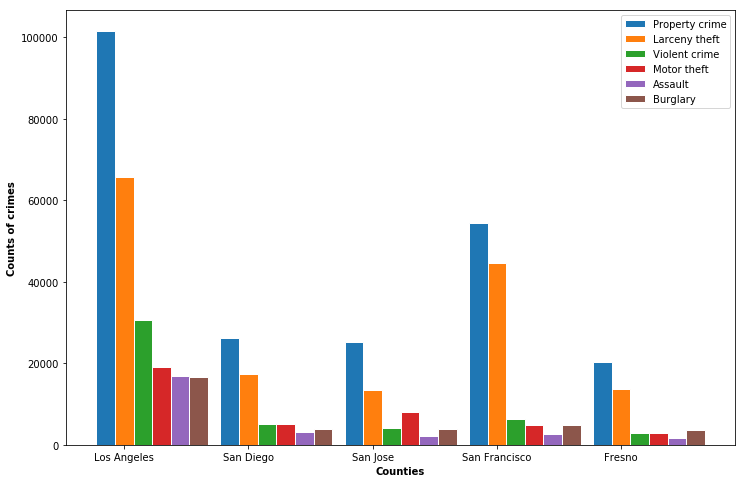

In [305]:
plt.figure(figsize=(12,8))
# set width of bar
barWidth = 0.15

# Set position of bar on X axis

# set height of bar
bars1 = df_top5.Property_crime
bars2 = df_top5.Larceny_theft
bars3 = df_top5.Violent_crime
bars4 = df_top5.Motor_theft
bars5 = df_top5.Assault
bars6 = df_top5.Burglary
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Make the plot
plt.bar(r1, bars1,  width=barWidth, edgecolor='white', label='Property crime')
plt.bar(r2, bars2,  width=barWidth, edgecolor='white', label='Larceny theft')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Violent crime')
plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='Motor theft')
plt.bar(r5, bars5, width=barWidth, edgecolor='white', label='Assault')
plt.bar(r6, bars6, width=barWidth, edgecolor='white', label='Burglary')
 
# Add xticks on the middle of the group bars
plt.xlabel('Counties', fontweight='bold')
plt.ylabel('Counts of crimes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# San Diego is quite safe given the second most populated cities. 

(0, 4500)

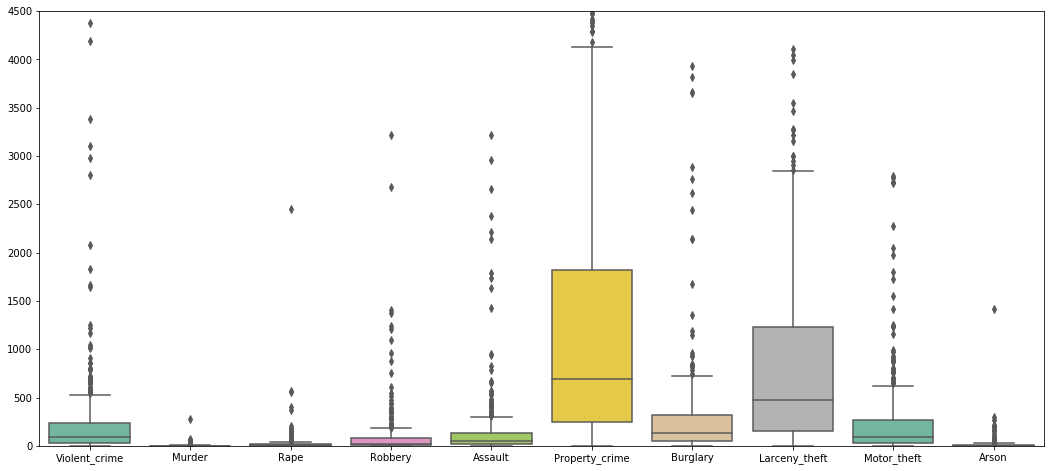

In [306]:
#Back to the main track 

plt.figure(figsize=(18,8))
sns.boxplot(data=df[['Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
       'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson']], palette='Set2')
# due to outliers in the 'Property_crime' and 'Larceny_theft' the visualization are not clear. 

plt.ylim(0,4500)
# We see that property crime is the most common type of crime, followed by larceny_theft. 
# Another visualization without these two common crime types. 



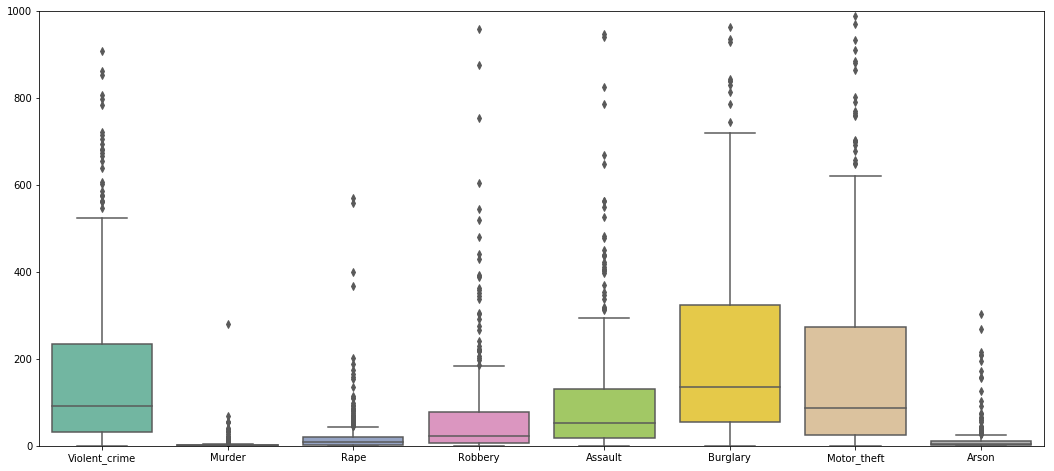

In [307]:
# Without 'Property_crime' and 'Larceny_theft'

plt.figure(figsize=(18,8))
sns.boxplot(data=df[['Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
        'Burglary', 'Motor_theft', 'Arson']], palette='Set2')
plt.ylim(0,1000)
plt.show()

# Still there are a lot of outliers for each attribute. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


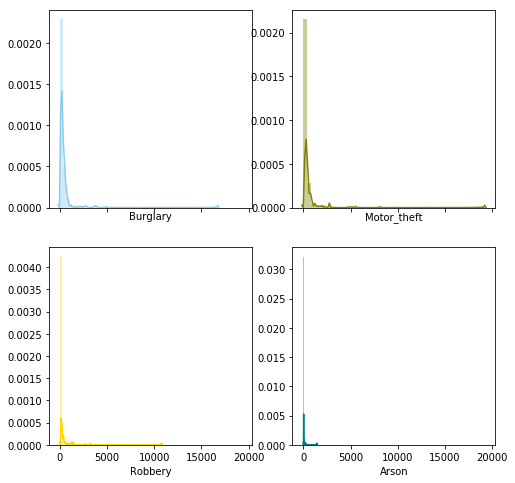

In [308]:
# plot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.distplot( df["Burglary"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["Motor_theft"] , color="olive", ax=axes[0, 1])
sns.distplot( df["Robbery"] , color="gold", ax=axes[1, 0])
sns.distplot( df["Arson"] , color="teal", ax=axes[1, 1])


In [309]:
#for col in df.columns:
#    if df[col].name == 'Population':
#        print(df[col])

In [310]:
# Normalizing the outliers 

# Winsorizing the outliers. Outliers in the both ends are substituted with a quantile value given by the function 
# The (limits[0])th lowest values are set to the (limits[0])th percentile, and the (limits[1])th highest values are set to the (limits[1])th percentile. 

# Winsorizing all except population
import scipy
from scipy import stats

for col in df.columns:
    if df[col].name == 'Population':
        df[col] = df[col]
    else:
        df[col] = scipy.stats.mstats.winsorize(df[col], limits=[0,0.03])  # .97 quantile


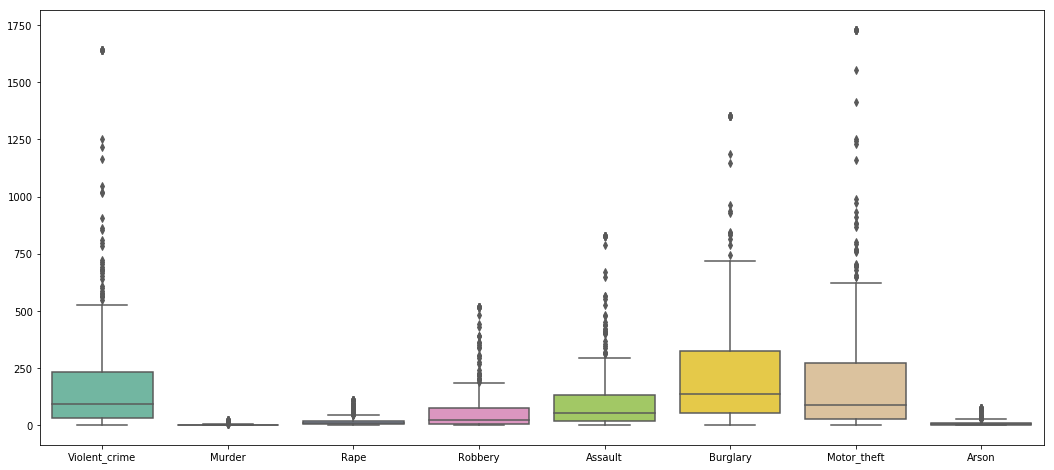

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


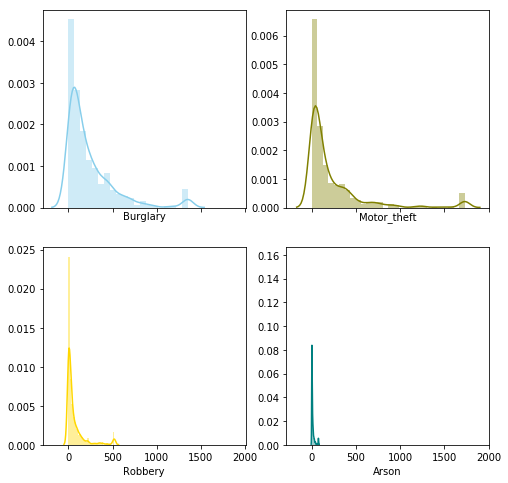

In [311]:
# Distributions look much better

plt.figure(figsize=(18,8))
sns.boxplot(data=df[['Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
        'Burglary', 'Motor_theft', 'Arson']], palette='Set2')
plt.show()

f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.distplot( df["Burglary"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["Motor_theft"] , color="olive", ax=axes[0, 1])
sns.distplot( df["Robbery"] , color="gold", ax=axes[1, 0])
sns.distplot( df["Arson"] , color="teal", ax=axes[1, 1])


In [312]:
# make comparative barplots - for loop that didn;t work

#def make_bar(df, col):
#
#    # set width of bar
#    barWidth = 0.25
#
#    # set height of bar
#    bar = df[col]
#     
#    # Set position of bar on X axis
#    #r = int(input("How many rows: "))
#    r = len(col)
#    rs = []
#    for r in np.arange(r):
#        row = [x + barWidth for x in r1]
#        rs.append(row)
#        


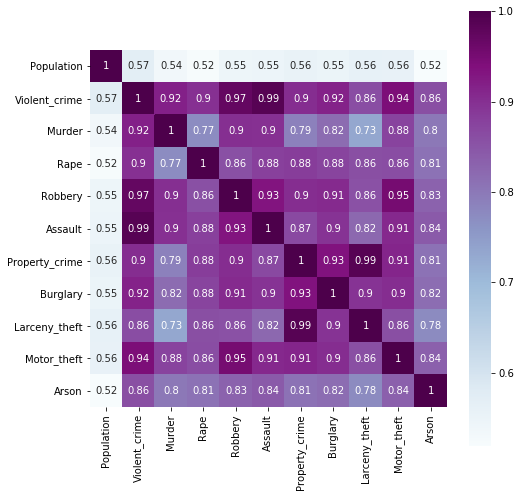

In [313]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='BuPu', annot=True, square=True)

Looking at the correlation plot, we see there is high multicollinearity in the data. For example, 'Violent_crime' is highly correlated (r > .95) with 'Robbery' and 'Assault'. 'Property_crime' is highly correlated with 'Larceny_theft'. Highly cprrelated variables must be removed from the model. But first, let's choose a response variable.

__Property crime as the response variable__

According to the FBI's Uniform Crime Reporting [(here)](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/property-crime/property-crime-topic-page/propertycrimemain_final), property crime includes the offenses of burglary, larceny-theft, motor vehicle theft, and arson. The object of the theft-type offenses is the taking of money or property, but there is no force or threat of force against the victims. The property crime category includes arson because the offense involves the destruction of property; however, arson victims may be subjected to force. Therefore, it is expected that the property crime will be highly correlated with these variables. 

Hence, we define that __Property crime__ as the following function:

$$ Property Crime = \alpha + Burglary + LarcenyTheft + MotorTheft + Arson $$

Multicollinearity with __Violent_crime__: 

- We need to remove multicollinear variables

- Create new features that are not highly multicollinear. 

But first, let's run a logistic regression model to see what it the default accuracy in the dataset. 

In [314]:
# Creating y

df.Property_crime.isna().sum()  # one null value
df['Property_crime'] = df['Property_crime'].fillna(df['Property_crime'].mean())

df.Property_crime.describe()

count     461.000000
mean     1388.422993
std      1777.012972
min         1.000000
25%       246.000000
50%       705.000000
75%      1819.000000
max      8465.000000
Name: Property_crime, dtype: float64

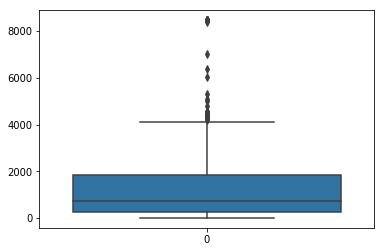

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


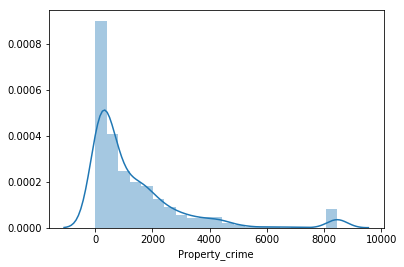

In [315]:
sns.boxplot(data=df.Property_crime)
plt.show()

sns.distplot(df.Property_crime)

In [320]:
df['y'] = np.where(df.Property_crime > df.Property_crime.mean(), 1, 0)
df.y.value_counts() #0-300, 1-161

0    300
1    161
Name: y, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


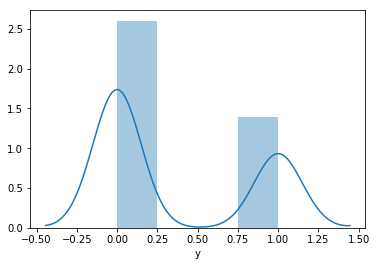

In [321]:
sns.distplot(df.y)

In [324]:
# Creating X and y
X = df.drop('y', axis=1)
y = df['y']


# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)


## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=111)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)


Coefficients
coefs: [[-2.38092381e-06  8.87659042e-03 -1.38918992e-02  3.63016368e-05
   1.71087874e-02 -1.90671868e-02  1.89302256e-03 -8.03954047e-03
  -6.29926786e-04  1.81918956e-03 -1.68213822e-03]]
intercept:  [-0.11541506]


In [326]:
#Predict
pred_y = LR.predict(X_test)

print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #79%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 77%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))

y       0   1
row_0        
0      59   6
1      31  43

R² for the model with many features: 
 [[-2.38092381e-06  8.87659042e-03 -1.38918992e-02  3.63016368e-05
   1.71087874e-02 -1.90671868e-02  1.89302256e-03 -8.03954047e-03
  -6.29926786e-04  1.81918956e-03 -1.68213822e-03]]

Percentage accuracy 0.7981366459627329

Mean crossvalidated accuracy:  0.79 with standard deviation 0.096

Confusion Matrix: 
 [[59  6]
 [31 43]]


In [327]:
# calculating Variance Inflation Factor for eliminative variables 

# $$ V.I.F. = 1 / (1 - R^2). $$

print(X_train.columns)

print('Intercept', fit.intercept_)
R_sqr = fit.coef_[0]

for n in R_sqr:
    print('coef: ', n, "\nVIF", 1/(1-n),'\n')

# Looks like no VIF is too large! Where is it going wrong? 


Index(['Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
       'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson'],
      dtype='object')
Intercept [-0.11541506]
coef:  -2.380923814482586e-06 
VIF 0.9999976190818542 

coef:  0.008876590424151627 
VIF 1.008956089966587 

coef:  -0.01389189917934891 
VIF 0.9862984414900711 

coef:  3.630163678881724e-05 
VIF 1.0000363029546455 

coef:  0.01710878743131651 
VIF 1.0174065931331346 

coef:  -0.01906718680399239 
VIF 0.9812895684888147 

coef:  0.0018930225635373625 
VIF 1.001896612894541 

coef:  -0.008039540469803005 
VIF 0.992024578256071 

coef:  -0.0006299267862767364 
VIF 0.9993704697716768 

coef:  0.0018191895578078471 
VIF 1.0018225050399454 

coef:  -0.0016821382183650386 
VIF 0.9983206866188541 



In [206]:
## Doesn't work! Return LinAlgError: singular Matrix

#Using Statsmodel for finding the feature importances 
import statsmodels.api as sm 

#X_statsmod = df[['Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
#       'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson']]
#X_statsmod['intercept'] = 1
#
#y = df['y']
#
## Declare the fit of the model 
#
#logit = sm.Logit(df['y'], X_statsmod)
#result = logit.fit()
#
## Result summary
#print(result.summary())

In [328]:
# Chossing a smaller model on 
#PropertyCrime = α+Burglary+LarcenyTheft+MotorTheft+Arson

# Creating X and y

X = df[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson']]
y = df['y']


# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)


## Logistic Regression 
LR = LogisticRegression(C=1e9)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)


Coefficients
coefs: [[ 0.01433829  0.0133972   0.0148919  -0.05799093]]
intercept:  [-18.10620665]


In [329]:
#Predict
pred_y = LR.predict(X_test)

print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #99%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 98%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))


# Accuracy increases? or overfitting?

y       0   1
row_0        
0      96   1
1       2  54

R² for the model with many features: 
 [[ 0.01433829  0.0133972   0.0148919  -0.05799093]]

Percentage accuracy 0.9967532467532467

Mean crossvalidated accuracy:  0.99 with standard deviation 0.02

Confusion Matrix: 
 [[96  1]
 [ 2 54]]


### Feature Engineering 



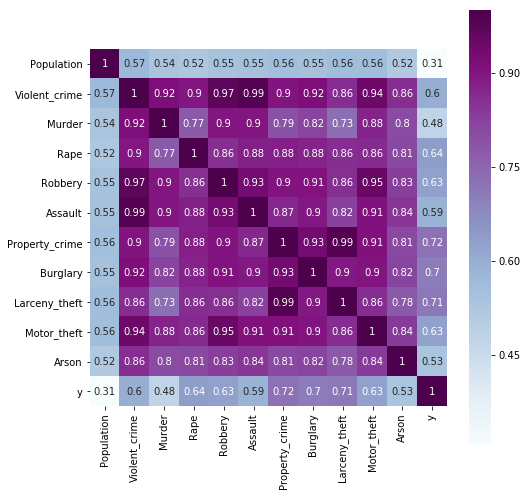

In [330]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='BuPu', annot=True, square=True)

In [340]:
# Creating new version on the dataset
df_new = df
#df_new.head()

In [341]:
df_new.head()

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson,y,rob_assault_crime,prop_crime_larceny
County,,,,,,,,,,,,,,
Adelanto,33693.0,238.0,2.0,28.0,48.0,160.0,578.0,190.0,290.0,98.0,13.0,0,446.0,868.0
Agoura Hills,20814.0,16.0,0.0,2.0,4.0,10.0,278.0,71.0,187.0,20.0,4.0,0,30.0,465.0
Alameda,79761.0,253.0,0.0,16.0,133.0,104.0,2347.0,219.0,1725.0,403.0,25.0,1,490.0,4072.0
Albany,19880.0,36.0,0.0,1.0,28.0,7.0,523.0,77.0,383.0,63.0,3.0,0,71.0,906.0
Alhambra,85865.0,172.0,4.0,17.0,89.0,62.0,1877.0,363.0,1244.0,270.0,12.0,1,323.0,3121.0


In [270]:
# New features 1: population percentage
#
#def perc_val(df, col):
#    for col in df.columns:
#        new_val = [col/pop *100 for col,pop in zip(df[col], df.Population)]
#    return new_val
#
#
#df_new['Violent_crime_perc'] = perc_val(df_new, 'Violent_crime')
#df_new['Murder_perc'] = perc_val(df_new, 'Murder')
#df_new['Rape_perc'] = perc_val(df_new, 'Rape')
#df_new['Robbery_perc'] = perc_val(df_new, 'Robbery')
#df_new['Burglary_perc'] = perc_val(df_new, 'Burglary')
#df_new['Larceny_theft_perc']= perc_val(df_new, 'Larceny_theft')
#df_new['Motor_theft_perc'] = perc_val(df_new, 'Motor_theft')
#df_new['Arson_perc'] = perc_val(df_new, 'Arson')

In [343]:
# Feature 2: Creating a variable for the highly correlated variables Violent_crime with Robbery and Assault
# New feature: rob_assault_crime = violent_crime + Robbery + Assault 

df_new['rob_assault_crime'] = df_new.Violent_crime + df_new.Robbery + df_new.Assault
# drop Violent_crime, Robbery and Assault

#df_new['prop_crime_larceny'] = df_new.Property_crime + df_new.Larceny_theft
# drop Property_crime and Larceny_theft

In [346]:
df_new.head(3)

#Burglary+LarcenyTheft+MotorTheft+Arson

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson,y,rob_assault_crime,prop_crime_larceny
County,,,,,,,,,,,,,,
Adelanto,33693.0,238.0,2.0,28.0,48.0,160.0,578.0,190.0,290.0,98.0,13.0,0,446.0,868.0
Agoura Hills,20814.0,16.0,0.0,2.0,4.0,10.0,278.0,71.0,187.0,20.0,4.0,0,30.0,465.0
Alameda,79761.0,253.0,0.0,16.0,133.0,104.0,2347.0,219.0,1725.0,403.0,25.0,1,490.0,4072.0


In [349]:
#df_new = df_new.drop(['Violent_crime', 'Robbery', 'Assault', 'Property_crime', 'Larceny_theft'], axis=1)

df_new = df_new.drop('prop_crime_larceny', axis=1)

In [350]:
df_new.describe()

,Population,Violent_crime,Murder,Rape,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson,y,rob_assault_crime
count,4.610000e+02,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,7.124899e+04,207.451193,2.108460,17.928416,66.984816,115.281996,1388.422993,240.503254,922.639913,225.945770,9.752711,0.349241,389.718004
std,2.150399e+05,325.710428,4.296251,24.919289,111.193592,170.807503,1777.012972,285.081214,1210.121676,356.009488,15.861754,0.477248,602.883725
min,1.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.221000e+04,33.000000,0.000000,3.000000,6.000000,19.000000,246.000000,55.000000,152.000000,26.000000,1.000000,0.000000,61.000000
50%,3.369300e+04,91.000000,1.000000,8.000000,23.000000,52.000000,705.000000,136.000000,482.000000,87.000000,4.000000,0.000000,175.000000
75%,7.632500e+04,234.000000,2.000000,20.000000,77.000000,131.000000,1819.000000,323.000000,1231.000000,273.000000,11.000000,1.000000,442.000000
max,4.007147e+06,1640.000000,21.000000,110.000000,519.000000,826.000000,8465.000000,1351.000000,5865.000000,1730.000000,75.000000,1.000000,2985.000000


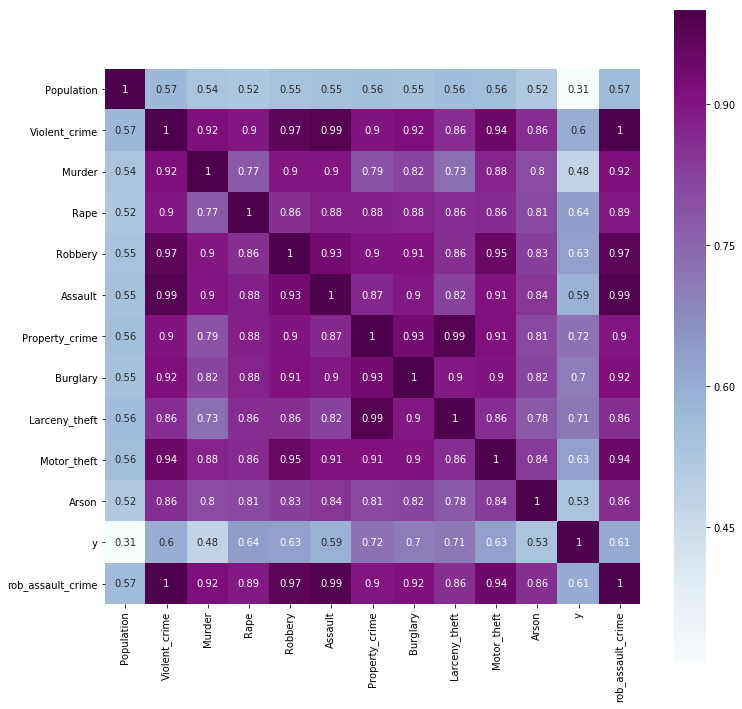

In [351]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(), cmap='BuPu', annot=True, square=True)

In [283]:
# Running new features again 
#New features 1: population percentage

def perc_val(df, col):
    for col in df.columns:
        new_val = [col/pop *100 for col,pop in zip(df[col], df.Population)]
    return new_val


df_new['Murder_perc'] = perc_val(df_new, 'Murder')
df_new['Rape_perc'] = perc_val(df_new, 'Rape')
df_new['prop_crime_perc'] = perc_val(df_new, 'Prop_crime_larceny')
df_new['Burglary_perc'] = perc_val(df_new, 'Burglary')
df_new['rob_assault_perc']= perc_val(df_new, 'rob_assault_crime')
df_new['Motor_theft_perc'] = perc_val(df_new, 'Motor_theft')
df_new['Arson_perc'] = perc_val(df_new, 'Arson')

In [284]:
df_new.head()

,Population,Murder,Rape,Burglary,Motor_theft,Arson,y,Violent_crime_perc,Murder_perc,Rape_perc,Robbery_perc,Burglary_perc,Larceny_theft_perc,Motor_theft_perc,Arson_perc,rob_assault_crime,prop_crime_larceny,prop_crime_perc,rob_assault_perc
County,,,,,,,,,,,,,,,,,,,
Adelanto,33693.0,2.0,28.0,190.0,98.0,13.0,0,0.000000,2.576203,2.576203,0.000000e+00,0.007646,0.000000e+00,0.000023,0.000023,446.0,868.0,2.576203,0.007646
Agoura Hills,20814.0,0.0,2.0,71.0,20.0,4.0,0,0.000000,2.234073,2.234073,0.000000e+00,0.010734,0.000000e+00,0.000052,0.000052,30.0,465.0,2.234073,0.010734
Alameda,79761.0,0.0,16.0,219.0,403.0,25.0,1,0.001254,5.105252,5.105252,2.470800e-12,0.006401,3.883796e-18,0.000008,0.000008,490.0,4072.0,5.105252,0.006401
Albany,19880.0,0.0,1.0,77.0,63.0,3.0,0,0.000000,4.557344,4.557344,0.000000e+00,0.022924,0.000000e+00,0.000115,0.000115,71.0,906.0,4.557344,0.022924
Alhambra,85865.0,4.0,17.0,363.0,270.0,12.0,1,0.001165,3.634776,3.634776,1.839650e-12,0.004233,2.495186e-18,0.000005,0.000005,323.0,3121.0,3.634776,0.004233


In [352]:
df_new.columns

Index(['Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery', 'Assault',
       'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson',
       'y', 'rob_assault_crime'],
      dtype='object')

In [353]:
# Creating X and y

# Burglary+LarcenyTheft+MotorTheft+Arson

# drop Violent_crime, Robbery and Assault

df_X = df_new[['Population', 'Murder', 'Rape','Property_crime', 
               'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]
y = df_new['y']


In [354]:
# Train test split 

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)

In [364]:

## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=111)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

Coefficients
coefs: [[-8.82382197e-07 -7.65943072e-05 -4.19682562e-03  5.73809722e-03
  -1.36314997e-02 -4.08592863e-03 -5.57890698e-05  2.08645123e-04
   2.99264390e-05]]
intercept:  [-0.00590381]


In [365]:
#Predict
pred_y = LR.predict(X_test)

print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #63%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 74%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))

y       0   1
row_0        
0      45   8
1      46  40

R² for the model with many features: 
 [[-8.82382197e-07 -7.65943072e-05 -4.19682562e-03  5.73809722e-03
  -1.36314997e-02 -4.08592863e-03 -5.57890698e-05  2.08645123e-04
   2.99264390e-05]]

Percentage accuracy 0.639751552795031

Mean crossvalidated accuracy:  0.72 with standard deviation 0.112

Confusion Matrix: 
 [[45  8]
 [46 40]]


In [372]:
# Ridge Regression - big model 

# Creating X and y
df_X = df_new[['Population', 'Murder', 'Rape','Property_crime', 
               'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]
y = df_new['y']


# Train test split 

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)


## Ridge Regression 
ridgereg = linear_model.Ridge(alpha=10, fit_intercept=False)

# Fit the model.
fit = ridgereg.fit(X_train, y_train)
#
# Display.
print('Ridge Regression Coefficients')
origparams = ridgereg.coef_[0]
print(origparams)

#Predict
pred_y = ridgereg.predict(X_test)

#print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #61%

score = cross_val_score(ridgereg, X_train, y_train, cv=10)  # 39%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))



Ridge Regression Coefficients
-1.4940855343297794e-07

R² for the model with many features: 
 [-1.49408553e-07 -1.52656514e-02 -1.90804538e-04  1.62502834e-03
 -1.29634433e-03 -1.32329124e-03 -1.40137212e-03 -3.79175410e-04
 -7.73668767e-06]

Percentage accuracy 0.6164842559614871

Mean crossvalidated accuracy:  0.39 with standard deviation 0.619


In [376]:
# Lasso Regression - big model 

# Creating X and y
df_X = df_new[['Population', 'Murder', 'Rape','Property_crime', 
               'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]
y = df_new['y']


# Train test split 
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)


## Ridge Regression 
lassreg = linear_model.Lasso(alpha=.35)

# Fit the model.
fit = lassreg.fit(X_train, y_train)
#
# Display.
print('Lasso Regression Coefficients')
origparams = lassreg.coef_[0]
print(origparams)

#Predict
pred_y = lassreg.predict(X_test)

#print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #58%

score = cross_val_score(lassreg, X_train, y_train, cv=10)  # 49%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))


Lasso Regression Coefficients
-1.2164269495998814e-06

R² for the model with many features: 
 [-1.21642695e-06 -0.00000000e+00  0.00000000e+00  8.64370177e-05
  1.09593001e-03  1.10624753e-04  1.27668699e-04 -0.00000000e+00
 -3.22938118e-04]

Percentage accuracy 0.5806467890165996

Mean crossvalidated accuracy:  0.49 with standard deviation 0.14


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [367]:
# Logistic Regression - Smaller model - better accuracy!

# Burglary+LarcenyTheft+MotorTheft+Arson

# drop Violent_crime, Robbery and Assault

df_X = df_new[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]
y = df_new['y']


# Train test split 
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)


## Logistic Regression 
LR = LogisticRegression(C=1e9, random_state=111)

# Fit the model.
fit = LR.fit(X_train, y_train)
#
# Display.
print('Coefficients')
print('coefs:', fit.coef_)
print('intercept: ', fit.intercept_)

#Predict
pred_y = LR.predict(X_test)

print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #99%

score = cross_val_score(LR, X_train, y_train, cv=10)  # 98%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))

from sklearn.metrics import confusion_matrix
print('\nConfusion Matrix: \n', confusion_matrix(pred_y, y_test))

Coefficients
coefs: [[ 0.0087086   0.00738414  0.00993141 -0.03058677  0.00099226]]
intercept:  [-10.79926669]
y       0   1
row_0        
0      91   0
1       2  46

R² for the model with many features: 
 [[ 0.0087086   0.00738414  0.00993141 -0.03058677  0.00099226]]

Percentage accuracy 0.9937888198757764

Mean crossvalidated accuracy:  0.98 with standard deviation 0.02

Confusion Matrix: 
 [[91  0]
 [ 2 46]]


In [374]:
# Ridge Regression - small model 

# Creating X and y
df_X = df_new[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]
y = df_new['y']


# Train test split 

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)


## Ridge Regression 
ridgereg = linear_model.Ridge(alpha=10, fit_intercept=False)

# Fit the model.
fit = ridgereg.fit(X_train, y_train)
#
# Display.
print('Ridge Regression Coefficients')
origparams = ridgereg.coef_[0]
print(origparams)

#Predict
pred_y = ridgereg.predict(X_test)

#print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #54%

score = cross_val_score(ridgereg, X_train, y_train, cv=10)  # 51%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))



Ridge Regression Coefficients
0.0011102041749425562

R² for the model with many features: 
 [ 0.0011102   0.00019947  0.00026438 -0.00108267 -0.00044616]

Percentage accuracy 0.5402212909194455

Mean crossvalidated accuracy:  0.47 with standard deviation 0.127


In [378]:
# Lasso Regression - small model 

# Creating X and y
df_X = df_new[['Burglary', 'Larceny_theft', 'Motor_theft', 'Arson','rob_assault_crime']]
y = df_new['y']

# Train test split 
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=.3)


## Ridge Regression 
lassreg = linear_model.Lasso(alpha=.35)

# Fit the model.
fit = lassreg.fit(X_train, y_train)
#
# Display.
print('Lasso Regression Coefficients')
origparams = lassreg.coef_[0]
print(origparams)

#Predict
pred_y = lassreg.predict(X_test)

#print(pd.crosstab(pred_y, y_test))
# why are crosstab values differ in row and columns as shown in the statsmodel? 

print('\nR² for the model with many features: \n', fit.coef_)
print('\nPercentage accuracy', fit.score(X_train, y_train))  #57%

score = cross_val_score(lassreg, X_train, y_train, cv=10)  # 55%
print("\nMean crossvalidated accuracy: ", round(score.mean(),2), 
      'with standard deviation', round(score.std(),3))


Lasso Regression Coefficients
0.0008348490387216285

R² for the model with many features: 
 [ 0.00083485  0.00020349  0.00013986 -0.         -0.00031481]

Percentage accuracy 0.557141024866211

Mean crossvalidated accuracy:  0.52 with standard deviation 0.09
